In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2023-06-24 11:00:13.182350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.12.0'

In [29]:
data = pd.read_csv('Datasets/personagens.csv')

In [37]:
data.shape

(293, 7)

In [38]:
data.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


<Axes: xlabel='classe', ylabel='count'>

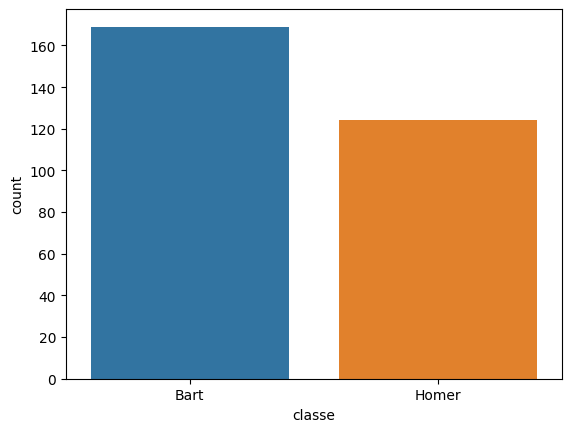

In [39]:
sns.countplot(x = 'classe', data=data)

/var/folders/kh/2q0m7g156hg30wfbbx43xn4m0000gn/T/ipykernel_87029/1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

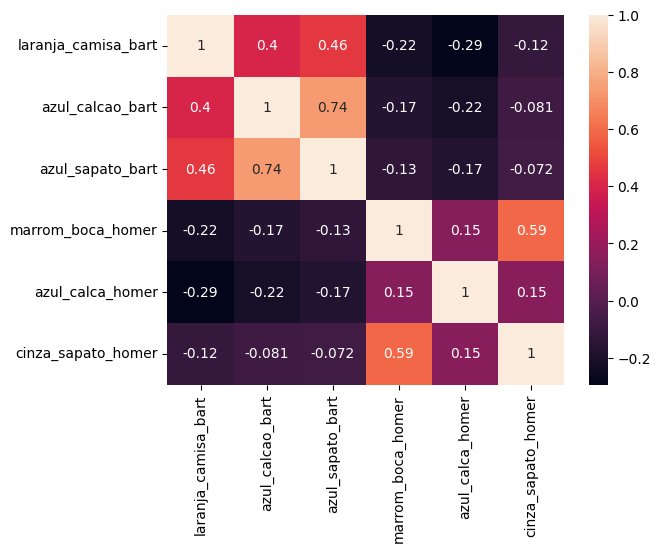

In [40]:
sns.heatmap(data.corr(), annot = True)

In [46]:
X = data.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [47]:
y = data.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [43]:
y = (y == 'Bart')
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
X_train.shape, y_train.shape

((234, 6), (234,))

In [55]:
X_test.shape, y_test.shape

((59, 6), (59,))

Construção da rede neural

In [64]:
(6+1)/2 #arredonda pra 4

3.5

In [65]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,))) #primeira camada
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #camada de saída que retorna uma probabilidade

In [67]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [70]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [72]:
historico = rede_neural.fit(X_train, y_train, epochs=50, validation_split=0.1) 

Epoch 1/50
7/7 [==============================] - 1s 40ms/step - loss: 1.0304 - accuracy: 0.3857 - val_loss: 0.7358 - val_accuracy: 0.5417
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.9728 - accuracy: 0.4143 - val_loss: 0.7010 - val_accuracy: 0.5417
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.9252 - accuracy: 0.4143 - val_loss: 0.6696 - val_accuracy: 0.5833
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.8821 - accuracy: 0.3952 - val_loss: 0.6437 - val_accuracy: 0.5833
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.8463 - accuracy: 0.3810 - val_loss: 0.6223 - val_accuracy: 0.5833
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.8152 - accuracy: 0.3810 - val_loss: 0.6036 - val_accuracy: 0.5417
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7873 - accuracy: 0.3762 - val_loss: 0.5879 - val_accuracy: 0.5417
Epoch 8/50
7/7 [================

Avaliação da rede neural

In [73]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

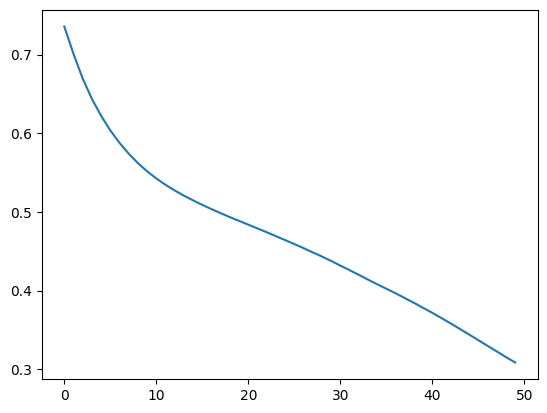

In [74]:
plt.plot(historico.history['val_loss']) #redução do erro ao passar das épocas

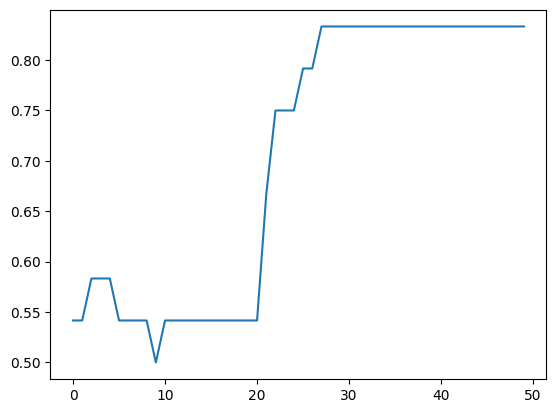

In [75]:
plt.plot(historico.history['val_accuracy'])

In [78]:
previsoes = rede_neural.predict(X_teste)
previsoes
#ver probabilidades que deveriam estar entre 0 e 1

2/2 [==============================] - 0s 3ms/step


array([[4.56540167e-01],
       [7.57213056e-01],
       [7.96021104e-01],
       [7.26557195e-01],
       [3.71924996e-01],
       [1.84106797e-01],
       [4.41487267e-04],
       [6.62403584e-01],
       [1.37578815e-01],
       [5.79493284e-01],
       [2.62609512e-01],
       [6.90512240e-01],
       [5.75930178e-01],
       [7.35785007e-01],
       [5.67716658e-01],
       [5.78292549e-01],
       [1.98238134e-01],
       [3.56573425e-02],
       [6.79502428e-01],
       [7.21262336e-01],
       [1.66144863e-01],
       [7.59048164e-01],
       [9.27679539e-02],
       [9.68900451e-04],
       [6.99189067e-01],
       [7.68655777e-01],
       [3.46275896e-01],
       [5.79194427e-01],
       [5.70571125e-01],
       [5.78021467e-01],
       [4.84666467e-01],
       [5.42813897e-01],
       [5.62725902e-01],
       [7.01515675e-01],
       [6.25463188e-01],
       [1.71850890e-01],
       [2.09265172e-01],
       [7.39606619e-01],
       [7.73590088e-01],
       [7.85475075e-01],


In [77]:
previsoes = (previsoes > 0.5)
previsoes 


array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [79]:
y_teste

array([False,  True,  True,  True, False, False, False,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False])